# Data Analysis

Vamos juntar tudo que aprendemos, e iniciar a exploração sobre uma base de dados, realizando experimentos com os modelos que aprendemos.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *

In [3]:
sc = SparkContext('local')
log_txt = sc.textFile("data/BaseCesarSchool.txt")
sqlContext = SQLContext(sc)

In [8]:
header = log_txt.first()
header_split = header.split("	")
print(header_split)

[u'ID', u'DtRef', u'IND_BOM_1', u'CEP', u'UF', u'IDADE', u'SEXO', u'NIVEL_RELACIONAMENTO_AUTOMOVEL', u'NIVEL_RELACIONAMENTO_SEGUROS01', u'NIVEL_RELACIONAMENTO_CREDITO03', u'NIVEL_RELACIONAMENTO_CREDITO04', u'NIVEL_RELACIONAMENTO_VAREJO', u'NIVEL_RELACIONAMENTO_SEGUROS02', u'NIVEL_RELACIONAMENTO_CREDITO01', u'NIVEL_RELACIONAMENTO_CREDITO02', u'BANCO_REST_IRPF_ULTIMA', u'ATIVIDADE_EMAIL', u'EXPOSICAO_ENDERECO', u'EXPOSICAO_EMAIL', u'EXPOSICAO_TELEFONE', u'ATIVIDADE_ENDERECO', u'ATUALIZACAO_ENDERECO', u'ATUALIZACAO_EMAIL', u'EXPOSICAO_CONSUMIDOR_COBRANCA', u'EXPOSICAO_CONSUMIDOR_EMAILS', u'EXPOSICAO_CONSUMIDOR_TELEFONES', u'ATIVIDADE_TELEFONE', u'VALOR_PARCELA_BOLSA_FAMILIA', u'FLAG_BOLSA_FAMILIA', u'SIGLA_PARTIDO_FILIADO', u'FLAG_FILIADO_PARTIDO_POLITICO', u'REMUNERACAO_SEVIDOR_CIVIL', u'FLAG_SERVIDOR_CIVIL', u'REMUNERACAO_SERVIDOR_MILITAR', u'FLAG_SERVIDOR_MILITAR', u'FLAG_PROUNI', u'RENDA_VIZINHANCA', u'QUANTIDADE_VIZINHANCA', u'COMPARATIVO_RENDA_CEP', u'CLASSE_SOCIAL_CONSUMIDOR', u'AT

In [17]:
log_txt = log_txt.filter(lambda line: line != header)
print log_txt.take(10)[3].split("	")

[u'5595', u'20160101', u'1', u'30140002', u'MG', u'52.88493150684931', u'F', u' ', u' ', u'1', u' ', u' ', u' ', u'1', u' ', u' ', u' ', u'19', u' ', u'4', u'2.2705364', u'0.3472488', u' ', u' ', u'0', u'1', u'6.6513586', u'154.0', u'1', u' ', u'0', u' ', u'0', u' ', u'0', u'1', u'ATE 2 SM', u'5187', u'1', u'D', u' ', u' ', u'1', u'1.0468832', u'0.93351716', u'0.14296035', u'0.14296035', u'0.07480878', u'0.03970214', u'0.1888529', u'0.06577337', u'0.20448162', u'0.123095535', u'0.8145828', u'0.29006267', u'0.2945903', u'0.5556791', u'1.1812762', u'0.15259692', u'0.24172018', u'0.32285312', u'0.1581816', u'0.151953', u'0.14346564', u'0.3127413', u'0.2755211', u'0.086209804', u'0.07480878', u'0.46719196', u'0.101209514', u'0.30325076', u'0.2312995', u'0.028814586', u'0.5163444', u'1.384862', u'0.23941728', u'1.2796113', u'0.16180561', u'218.81659', u'300.0', u'300.0', u'4', u'6', u'64', u'179', u'160', u'215', u'2373', u'215', u'151', u'204', u'213', u'19', u'95', u'32', u'24', u'5736', 

In [22]:
temp_var = log_txt.map(lambda k: k.split("	"))
print "Number of instances: {}".format(temp_var.countApprox(1000, 1.0))

Number of instances: 518930


## From Spark to Pandas DataFrame

In [32]:
sample = temp_var.take(2000)

In [33]:
df = pd.DataFrame(data=sample, columns=header_split)
df.head()

,ID,DtRef,IND_BOM_1,CEP,UF,IDADE,SEXO,NIVEL_RELACIONAMENTO_AUTOMOVEL,NIVEL_RELACIONAMENTO_SEGUROS01,NIVEL_RELACIONAMENTO_CREDITO03,...,FLAG_WEB_SOCIEDADE_GENEALOGIA,EXPOSICAO_WEB,FLAG_WEB_CIENCIA,FLAG_WEB_COMPRAS,FLAG_WEB_ESPORTES_FUTEBOL,FLAG_WEB,CEP1,CEP2,CEP3,CEP4
0,1617,20160501,1,07085460,SP,63.00547945205479,M,,,1,...,0,851,0,0,0,1,0,07,070,0708
1,4106,20160101,1,35420000,MG,60.52876712328767,M,,,1,...,0,1,0,0,0,1,3,35,354,3542
2,2357,20160101,0,80010010,PR,20.446575342465753,F,,,1,...,0,4380,0,0,0,1,8,80,800,8001
3,5595,20160101,1,30140002,MG,52.88493150684931,F,,,1,...,0,5580,0,0,0,1,3,30,301,3014
4,1022,20160101,1,59073120,RN,30.75068493150685,M,,,1,...,0,85,0,0,0,1,5,59,590,5907


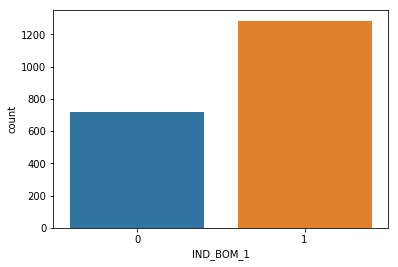

In [34]:
# Vamos ver se pegamos uma amostra interessante com classes balanceadas
sns.countplot(x='IND_BOM_1', data=df)

In [36]:
# checking for missing data
print('Has missing data: {}'.format(df.isnull().values.any()))

Has missing data: False


In [41]:
# Empty string is NULL, então vamos dar um replace
df.replace(to_replace=' ', value=np.nan, inplace=True)
print('Has missing data: {}'.format(df.isnull().values.any()))

Has missing data: True


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 140 entries, ID to CEP4
dtypes: object(140)
memory usage: 2.1+ MB


In [43]:
df.describe()

,ID,DtRef,IND_BOM_1,CEP,UF,IDADE,SEXO,NIVEL_RELACIONAMENTO_AUTOMOVEL,NIVEL_RELACIONAMENTO_SEGUROS01,NIVEL_RELACIONAMENTO_CREDITO03,...,FLAG_WEB_SOCIEDADE_GENEALOGIA,EXPOSICAO_WEB,FLAG_WEB_CIENCIA,FLAG_WEB_COMPRAS,FLAG_WEB_ESPORTES_FUTEBOL,FLAG_WEB,CEP1,CEP2,CEP3,CEP4
count,2000,2000,2000,2000,2000,1999,1985,10,10,2000,...,1858,1858,1858,1858,1858,1858,2000,2000,2000,2000
unique,1772,4,2,1840,27,1881,2,9,5,3,...,2,583,2,2,2,1,10,98,652,1484
top,1176,20160901,1,97670000,SP,38.92876712328767,M,36.0,1,1,...,0,10000,0,0,0,1,1,13,130,3840
freq,3,527,1284,5,489,3,1040,2,4,1990,...,1778,375,1807,1716,1812,1858,252,76,18,7


In [44]:
df.head()

,ID,DtRef,IND_BOM_1,CEP,UF,IDADE,SEXO,NIVEL_RELACIONAMENTO_AUTOMOVEL,NIVEL_RELACIONAMENTO_SEGUROS01,NIVEL_RELACIONAMENTO_CREDITO03,...,FLAG_WEB_SOCIEDADE_GENEALOGIA,EXPOSICAO_WEB,FLAG_WEB_CIENCIA,FLAG_WEB_COMPRAS,FLAG_WEB_ESPORTES_FUTEBOL,FLAG_WEB,CEP1,CEP2,CEP3,CEP4
0,1617,20160501,1,07085460,SP,63.00547945205479,M,NaN,NaN,1,...,0,851,0,0,0,1,0,07,070,0708
1,4106,20160101,1,35420000,MG,60.52876712328767,M,NaN,NaN,1,...,0,1,0,0,0,1,3,35,354,3542
2,2357,20160101,0,80010010,PR,20.446575342465753,F,NaN,NaN,1,...,0,4380,0,0,0,1,8,80,800,8001
3,5595,20160101,1,30140002,MG,52.88493150684931,F,NaN,NaN,1,...,0,5580,0,0,0,1,3,30,301,3014
4,1022,20160101,1,59073120,RN,30.75068493150685,M,NaN,NaN,1,...,0,85,0,0,0,1,5,59,590,5907


In [49]:
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        pass

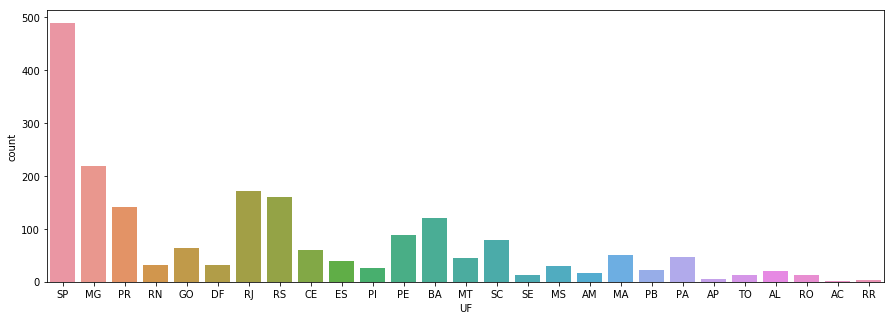

In [54]:
plt.figure(figsize=(15, 5))
sns.countplot(x='UF', data=df)

## Using Spark DataFrame

In [57]:
from pyspark.sql import Row

In [59]:
print(header_split)

[u'ID', u'DtRef', u'IND_BOM_1', u'CEP', u'UF', u'IDADE', u'SEXO', u'NIVEL_RELACIONAMENTO_AUTOMOVEL', u'NIVEL_RELACIONAMENTO_SEGUROS01', u'NIVEL_RELACIONAMENTO_CREDITO03', u'NIVEL_RELACIONAMENTO_CREDITO04', u'NIVEL_RELACIONAMENTO_VAREJO', u'NIVEL_RELACIONAMENTO_SEGUROS02', u'NIVEL_RELACIONAMENTO_CREDITO01', u'NIVEL_RELACIONAMENTO_CREDITO02', u'BANCO_REST_IRPF_ULTIMA', u'ATIVIDADE_EMAIL', u'EXPOSICAO_ENDERECO', u'EXPOSICAO_EMAIL', u'EXPOSICAO_TELEFONE', u'ATIVIDADE_ENDERECO', u'ATUALIZACAO_ENDERECO', u'ATUALIZACAO_EMAIL', u'EXPOSICAO_CONSUMIDOR_COBRANCA', u'EXPOSICAO_CONSUMIDOR_EMAILS', u'EXPOSICAO_CONSUMIDOR_TELEFONES', u'ATIVIDADE_TELEFONE', u'VALOR_PARCELA_BOLSA_FAMILIA', u'FLAG_BOLSA_FAMILIA', u'SIGLA_PARTIDO_FILIADO', u'FLAG_FILIADO_PARTIDO_POLITICO', u'REMUNERACAO_SEVIDOR_CIVIL', u'FLAG_SERVIDOR_CIVIL', u'REMUNERACAO_SERVIDOR_MILITAR', u'FLAG_SERVIDOR_MILITAR', u'FLAG_PROUNI', u'RENDA_VIZINHANCA', u'QUANTIDADE_VIZINHANCA', u'COMPARATIVO_RENDA_CEP', u'CLASSE_SOCIAL_CONSUMIDOR', u'AT

In [60]:
spark_df = temp_var.toDF(header_split)

In [62]:
spark_df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- DtRef: string (nullable = true)
 |-- IND_BOM_1: string (nullable = true)
 |-- CEP: string (nullable = true)
 |-- UF: string (nullable = true)
 |-- IDADE: string (nullable = true)
 |-- SEXO: string (nullable = true)
 |-- NIVEL_RELACIONAMENTO_AUTOMOVEL: string (nullable = true)
 |-- NIVEL_RELACIONAMENTO_SEGUROS01: string (nullable = true)
 |-- NIVEL_RELACIONAMENTO_CREDITO03: string (nullable = true)
 |-- NIVEL_RELACIONAMENTO_CREDITO04: string (nullable = true)
 |-- NIVEL_RELACIONAMENTO_VAREJO: string (nullable = true)
 |-- NIVEL_RELACIONAMENTO_SEGUROS02: string (nullable = true)
 |-- NIVEL_RELACIONAMENTO_CREDITO01: string (nullable = true)
 |-- NIVEL_RELACIONAMENTO_CREDITO02: string (nullable = true)
 |-- BANCO_REST_IRPF_ULTIMA: string (nullable = true)
 |-- ATIVIDADE_EMAIL: string (nullable = true)
 |-- EXPOSICAO_ENDERECO: string (nullable = true)
 |-- EXPOSICAO_EMAIL: string (nullable = true)
 |-- EXPOSICAO_TELEFONE: string (nullable = true)


In [67]:
for col_name in header_split:
    try:
        spark_df = spark_df.withColumn(col_name, spark_df[col_name].cast(FloatType()))
    except:
        spark_df = spark_df.withColumn(col_name, spark_df[col_name].cast(StringType()))

In [68]:
spark_df.printSchema()

root
 |-- ID: float (nullable = true)
 |-- DtRef: float (nullable = true)
 |-- IND_BOM_1: float (nullable = true)
 |-- CEP: float (nullable = true)
 |-- UF: float (nullable = true)
 |-- IDADE: float (nullable = true)
 |-- SEXO: float (nullable = true)
 |-- NIVEL_RELACIONAMENTO_AUTOMOVEL: float (nullable = true)
 |-- NIVEL_RELACIONAMENTO_SEGUROS01: float (nullable = true)
 |-- NIVEL_RELACIONAMENTO_CREDITO03: float (nullable = true)
 |-- NIVEL_RELACIONAMENTO_CREDITO04: float (nullable = true)
 |-- NIVEL_RELACIONAMENTO_VAREJO: float (nullable = true)
 |-- NIVEL_RELACIONAMENTO_SEGUROS02: float (nullable = true)
 |-- NIVEL_RELACIONAMENTO_CREDITO01: float (nullable = true)
 |-- NIVEL_RELACIONAMENTO_CREDITO02: float (nullable = true)
 |-- BANCO_REST_IRPF_ULTIMA: float (nullable = true)
 |-- ATIVIDADE_EMAIL: float (nullable = true)
 |-- EXPOSICAO_ENDERECO: float (nullable = true)
 |-- EXPOSICAO_EMAIL: float (nullable = true)
 |-- EXPOSICAO_TELEFONE: float (nullable = true)
 |-- ATIVIDADE_ENDER

In [70]:
spark_df.select('IND_BOM_1').show(10)

+---------+
|IND_BOM_1|
+---------+
|      1.0|
|      1.0|
|      0.0|
|      1.0|
|      1.0|
|      1.0|
|      0.0|
|      1.0|
|      1.0|
|      0.0|
+---------+
only showing top 10 rows



In [74]:
from pyspark.ml.linalg import DenseVector
from pyspark.sql import SparkSession

spark = SparkSession.builder \
   .master("local") \
   .appName("Linear Regression Model") \
   .config("spark.executor.memory", "1gb") \
   .getOrCreate()

input_data = spark_df.rdd.map(lambda x: (x[2], DenseVector(x[7:15])))
df = spark.createDataFrame(input_data, ["label", "features"])

In [79]:
df.take(2)

[Row(label=1.0, features=DenseVector([nan, nan, 1.0, nan, nan, nan, 1.0, nan])),
 Row(label=1.0, features=DenseVector([nan, nan, 1.0, nan, nan, nan, 1.0, nan]))]

In [75]:
from pyspark.ml.feature import StandardScaler

standardScaler = StandardScaler(inputCol="features", outputCol="features_scaled")
scaler = standardScaler.fit(df)
scaled_df = scaler.transform(df)

In [80]:
train_data, test_data = scaled_df.randomSplit([.75,.25],seed=1234)

In [81]:
from pyspark.ml.classification import LogisticRegression

lc = LogisticRegression(labelCol="label", maxIter=10)
logistModel = lc.fit(train_data)

Py4JJavaError: An error occurred while calling o893.fit.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 10 in stage 29.0 failed 1 times, most recent failure: Lost task 10.0 in stage 29.0 (TID 70, localhost, executor driver): scala.MatchError: [null,1.0,[NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN]] (of class org.apache.spark.sql.catalyst.expressions.GenericRowWithSchema)
	at org.apache.spark.ml.classification.LogisticRegression$$anonfun$12.apply(LogisticRegression.scala:330)
	at org.apache.spark.ml.classification.LogisticRegression$$anonfun$12.apply(LogisticRegression.scala:330)
	at scala.collection.Iterator$$anon$11.next(Iterator.scala:409)
	at org.apache.spark.storage.memory.MemoryStore.putIteratorAsValues(MemoryStore.scala:216)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1005)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:996)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:936)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:996)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:700)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:334)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:285)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:96)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:53)
	at org.apache.spark.scheduler.Task.run(Task.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:322)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	at java.lang.Thread.run(Thread.java:745)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1435)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1423)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1422)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1422)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:802)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:802)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1650)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1605)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1594)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:628)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1925)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1988)
	at org.apache.spark.rdd.RDD$$anonfun$reduce$1.apply(RDD.scala:1026)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:362)
	at org.apache.spark.rdd.RDD.reduce(RDD.scala:1008)
	at org.apache.spark.rdd.RDD$$anonfun$treeAggregate$1.apply(RDD.scala:1151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:362)
	at org.apache.spark.rdd.RDD.treeAggregate(RDD.scala:1128)
	at org.apache.spark.ml.classification.LogisticRegression.train(LogisticRegression.scala:352)
	at org.apache.spark.ml.classification.LogisticRegression.train(LogisticRegression.scala:322)
	at org.apache.spark.ml.classification.LogisticRegression.train(LogisticRegression.scala:193)
	at org.apache.spark.ml.Predictor.fit(Predictor.scala:96)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:497)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:745)
Caused by: scala.MatchError: [null,1.0,[NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN]] (of class org.apache.spark.sql.catalyst.expressions.GenericRowWithSchema)
	at org.apache.spark.ml.classification.LogisticRegression$$anonfun$12.apply(LogisticRegression.scala:330)
	at org.apache.spark.ml.classification.LogisticRegression$$anonfun$12.apply(LogisticRegression.scala:330)
	at scala.collection.Iterator$$anon$11.next(Iterator.scala:409)
	at org.apache.spark.storage.memory.MemoryStore.putIteratorAsValues(MemoryStore.scala:216)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1005)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:996)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:936)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:996)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:700)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:334)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:285)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:96)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:53)
	at org.apache.spark.scheduler.Task.run(Task.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:322)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	... 1 more


In [ ]:
predicted = linearModel.transform(test_data)